In [1]:
# ANALYSIS FOR BRAZIL

In [2]:
# Install and import the appropriate libraries and dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read CSV file into a dataframe.
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

#print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
# Use only the Summer Olympics for Analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

# Create a dataframe for only the Brazil team in the Summer Olympics
brazil_df = summer_df[(summer_df['Team'] == 'Brazil') | (summer_df['Team'] == 'Brazil-1') | (summer_df['Team'] == 'Brazil-2')]

# create a dataframe for every team except UK in the Summer Olympics
#rest_of_world_df = olympics_df[olympics_df['Team'] != 'England']

In [11]:
# Create a dataframe for the Brazil team in the Summer Olympics grouped by Games. 
games_df_brazil = brazil_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_brazil['gold_medals'] = brazil_df[brazil_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_brazil['silver_medals'] = brazil_df[brazil_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_brazil['bronze_medals'] = brazil_df[brazil_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# Fill NaN values with 0
games_df_brazil = games_df_brazil.fillna(0)

# Format values in all columns except Games to integers
games_df_brazil = games_df_brazil.astype(int)

games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1900 Summer,0,0,0,0
1920 Summer,7,1,1,5
1924 Summer,0,0,0,0
1932 Summer,0,0,0,0
1936 Summer,0,0,0,0
1948 Summer,10,0,0,10
1952 Summer,3,1,0,2
1956 Summer,1,1,0,0


In [12]:
# Add a column for non-medal participations, which is the count of all rows for Games where Medal is NaN
games_df_brazil['non_medal_participations'] = brazil_df[brazil_df['Medal'].isnull()].groupby('Games').size()

# Add a column for total participations, which is the count of all rows for Games.
# This includes 0 or NaN values for medals
games_df_brazil['total_participations'] = brazil_df.groupby('Games').size()
games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations
,count,,,,,
Games,,,,,,
1900 Summer,0,0,0,0,3,3
1920 Summer,7,1,1,5,31,38
1924 Summer,0,0,0,0,18,18
1932 Summer,0,0,0,0,67,67
1936 Summer,0,0,0,0,93,93
1948 Summer,10,0,0,10,91,101
1952 Summer,3,1,0,2,111,114
1956 Summer,1,1,0,0,60,61


In [13]:
# Create a column called 'medal_rate' which is the ratio of medal count to total participation count
games_df_brazil['medal_rate'] = games_df_brazil['Medal']['count'] / games_df_brazil['total_participations']
games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations,medal_rate
,count,,,,,,
Games,,,,,,,
1900 Summer,0,0,0,0,3,3,0.000000
1920 Summer,7,1,1,5,31,38,0.184211
1924 Summer,0,0,0,0,18,18,0.000000
1932 Summer,0,0,0,0,67,67,0.000000
1936 Summer,0,0,0,0,93,93,0.000000
1948 Summer,10,0,0,10,91,101,0.099010
1952 Summer,3,1,0,2,111,114,0.026316
1956 Summer,1,1,0,0,60,61,0.016393


In [14]:
# create columns called gold_percentage, silver_percentage, bronze_percentage and non_medal_percentage
games_df_brazil['gold_percentage'] = games_df_brazil['gold_medals'] / games_df_brazil['Medal']['count']
games_df_brazil['silver_percentage'] = games_df_brazil['silver_medals'] / games_df_brazil['Medal']['count']
games_df_brazil['bronze_percentage'] = games_df_brazil['bronze_medals'] / games_df_brazil['Medal']['count']
games_df_brazil['non_medal_percentage'] = games_df_brazil['non_medal_participations'] / games_df_brazil['total_participations']

games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations,medal_rate,gold_percentage,silver_percentage,bronze_percentage,non_medal_percentage
,count,,,,,,,,,,
Games,,,,,,,,,,,
1900 Summer,0,0,0,0,3,3,0.000000,NaN,NaN,NaN,1.000000
1920 Summer,7,1,1,5,31,38,0.184211,0.142857,0.142857,0.714286,0.815789
1924 Summer,0,0,0,0,18,18,0.000000,NaN,NaN,NaN,1.000000
1932 Summer,0,0,0,0,67,67,0.000000,NaN,NaN,NaN,1.000000
1936 Summer,0,0,0,0,93,93,0.000000,NaN,NaN,NaN,1.000000
1948 Summer,10,0,0,10,91,101,0.099010,0.000000,0.000000,1.000000,0.900990
1952 Summer,3,1,0,2,111,114,0.026316,0.333333,0.000000,0.666667,0.973684
1956 Summer,1,1,0,0,60,61,0.016393,1.000000,0.000000,0.000000,0.983607


<Axes: xlabel='Games'>

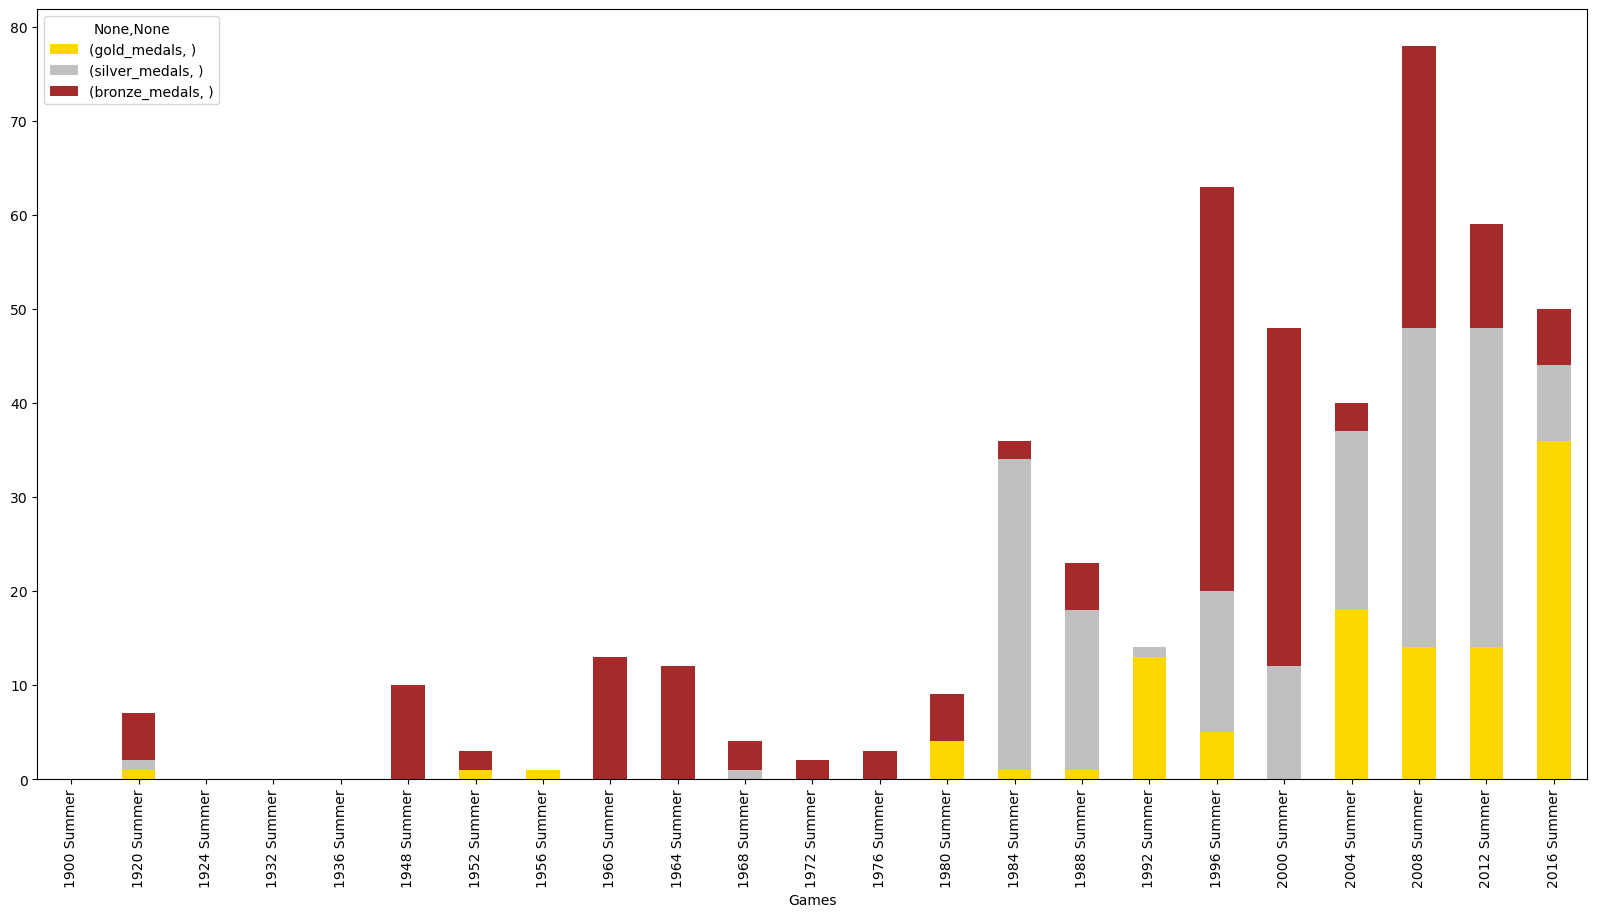

In [42]:
# Plot the gold_medals, silver_medals, bronze_medals and non_medal_participations for the Brazil team in the Summer Olympics.
# Use a stacked bar chart, where the total size of the bar is the total_participations

colors = ['gold','silver','brown']

games_df_brazil[['gold_medals', 'silver_medals', 'bronze_medals']].plot(kind='bar', stacked=True, figsize=(20, 10), color = colors)


<Axes: xlabel='Games'>

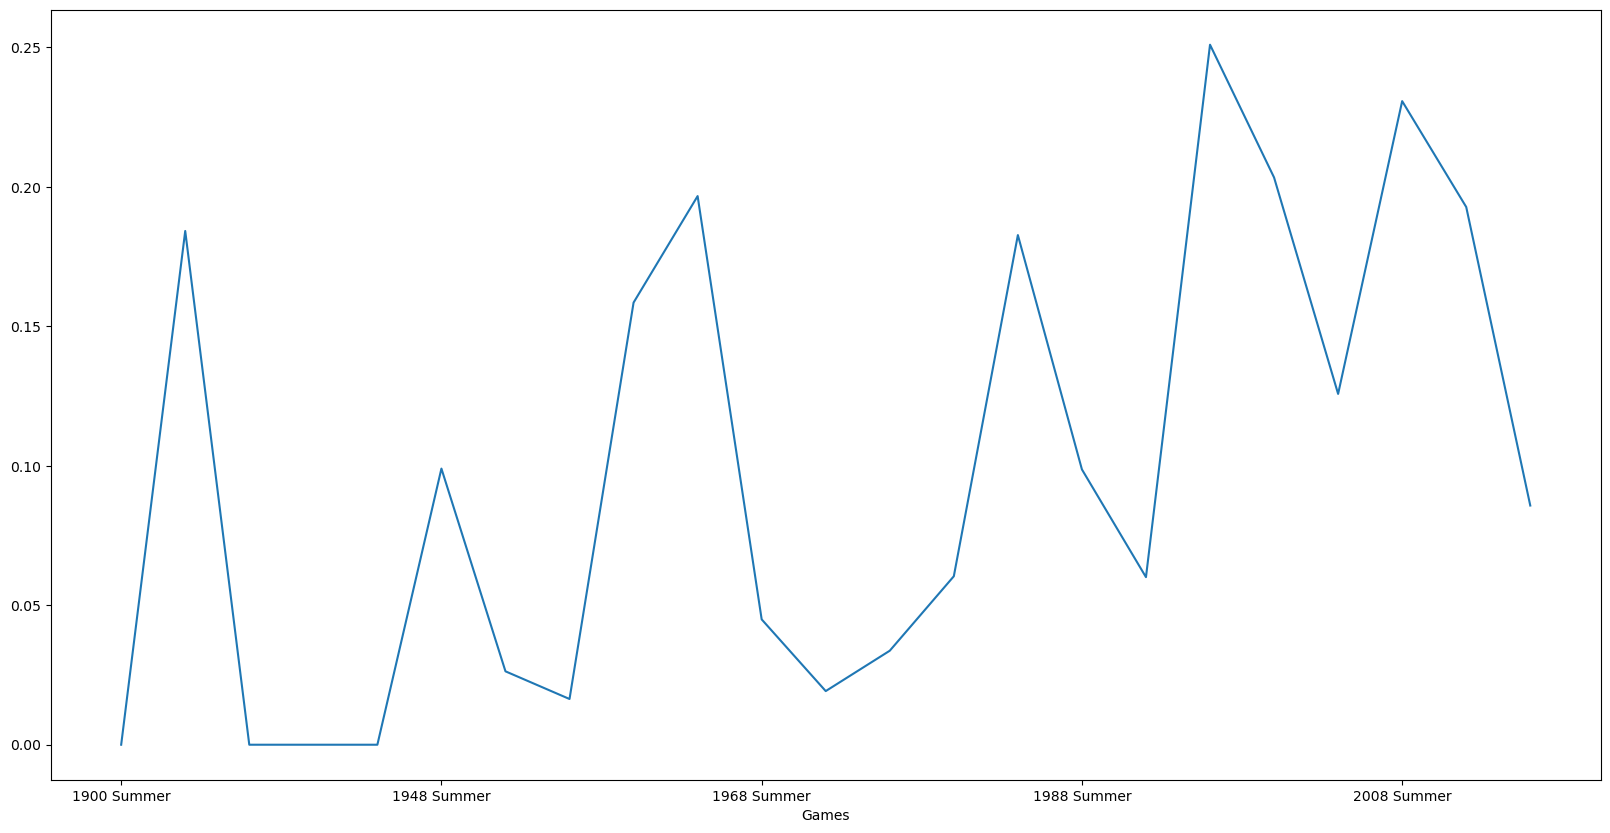

In [16]:
# Use a line chart to plot the medal_rate for the Brazil team in the Summer Olympics.
games_df_brazil['medal_rate'].plot(kind='line', figsize=(20, 10))

In [ ]:
#### Unreconciled China code ----------------------------------------

<Axes: xlabel='Games'>

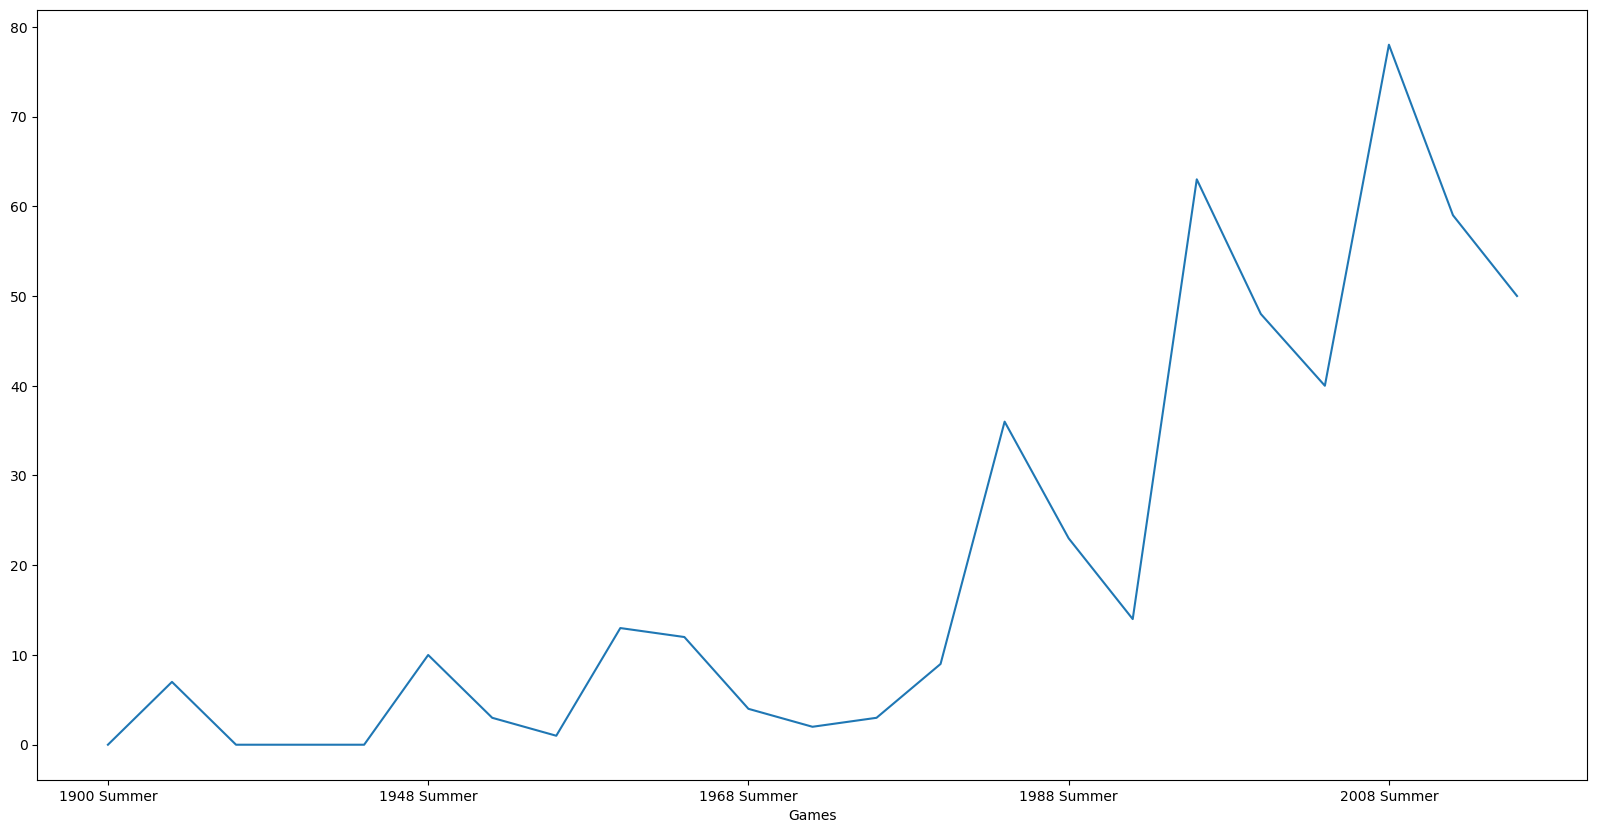

In [17]:
# Use a line chart to plot the medal count for the Brazil team in the Summer Olympics.
games_df_brazil['Medal']['count'].plot(kind='line', figsize=(20, 10))

In [18]:
# Calculate the average medal count for the Brazil team for the summer olympics
average_medal_count_brazil = games_df_brazil['Medal']['count'].mean()
print(average_medal_count_brazil)

# Calculate the average medal count for the Brazil team in the games where they won at least one medal
average_medal_count_brazil_won = games_df_brazil[games_df_brazil['Medal']['count'] > 0]['Medal']['count'].mean()
print(average_medal_count_brazil_won)

20.652173913043477
25.0


In [20]:
# Calculate the standard deviation of the medal count for the Brazil team for the summer olympics
std_dev_medal_count_brazil = games_df_brazil['Medal']['count'].std()
print(std_dev_medal_count_brazil)

# Calculate the standard deviation of the medal count for the Brazil team in the games where they won at least one medal
std_dev_medal_count_brazil_won = games_df_brazil[games_df_brazil['Medal']['count'] > 0]['Medal']['count'].std()
print(std_dev_medal_count_brazil_won)

24.056011714428955
24.342464040346357


In [21]:
# Show the medal count for the 2016 Summer Games
games_df_brazil.loc['2016 Summer'] 

Medal                     count     50.000000
gold_medals                         36.000000
silver_medals                        8.000000
bronze_medals                        6.000000
non_medal_participations           533.000000
total_participations               583.000000
medal_rate                           0.085763
gold_percentage                      0.720000
silver_percentage                    0.160000
bronze_percentage                    0.120000
non_medal_percentage                 0.914237
Name: 2016 Summer, dtype: float64

In [22]:
from scipy.stats import zscore

# add z_scores column to the games_df_brazil dataframe
games_df_brazil['z_scores'] = zscore(games_df_brazil['Medal']['count'])
games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations,medal_rate,gold_percentage,silver_percentage,bronze_percentage,non_medal_percentage,z_scores
,count,,,,,,,,,,,
Games,,,,,,,,,,,,
1900 Summer,0,0,0,0,3,3,0.000000,NaN,NaN,NaN,1.000000,-0.877798
1920 Summer,7,1,1,5,31,38,0.184211,0.142857,0.142857,0.714286,0.815789,-0.580271
1924 Summer,0,0,0,0,18,18,0.000000,NaN,NaN,NaN,1.000000,-0.877798
1932 Summer,0,0,0,0,67,67,0.000000,NaN,NaN,NaN,1.000000,-0.877798
1936 Summer,0,0,0,0,93,93,0.000000,NaN,NaN,NaN,1.000000,-0.877798
1948 Summer,10,0,0,10,91,101,0.099010,0.000000,0.000000,1.000000,0.900990,-0.452759
1952 Summer,3,1,0,2,111,114,0.026316,0.333333,0.000000,0.666667,0.973684,-0.750287
1956 Summer,1,1,0,0,60,61,0.016393,1.000000,0.000000,0.000000,0.983607,-0.835294


C:\Users\17049\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

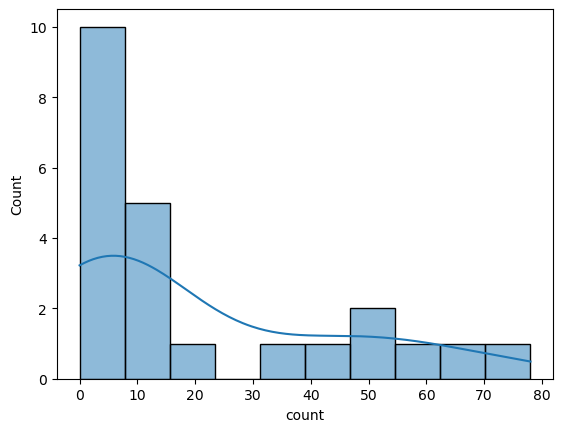

In [23]:
import seaborn as sns

# Plot the distribution of the medal count for the Brazil team in the Summer Olympics
sns.histplot(games_df_brazil['Medal']['count'], bins=10, kde=True)

In [ ]:
#### Unreconciled UK code --------------------------------------------------

<Axes: xlabel='Games'>

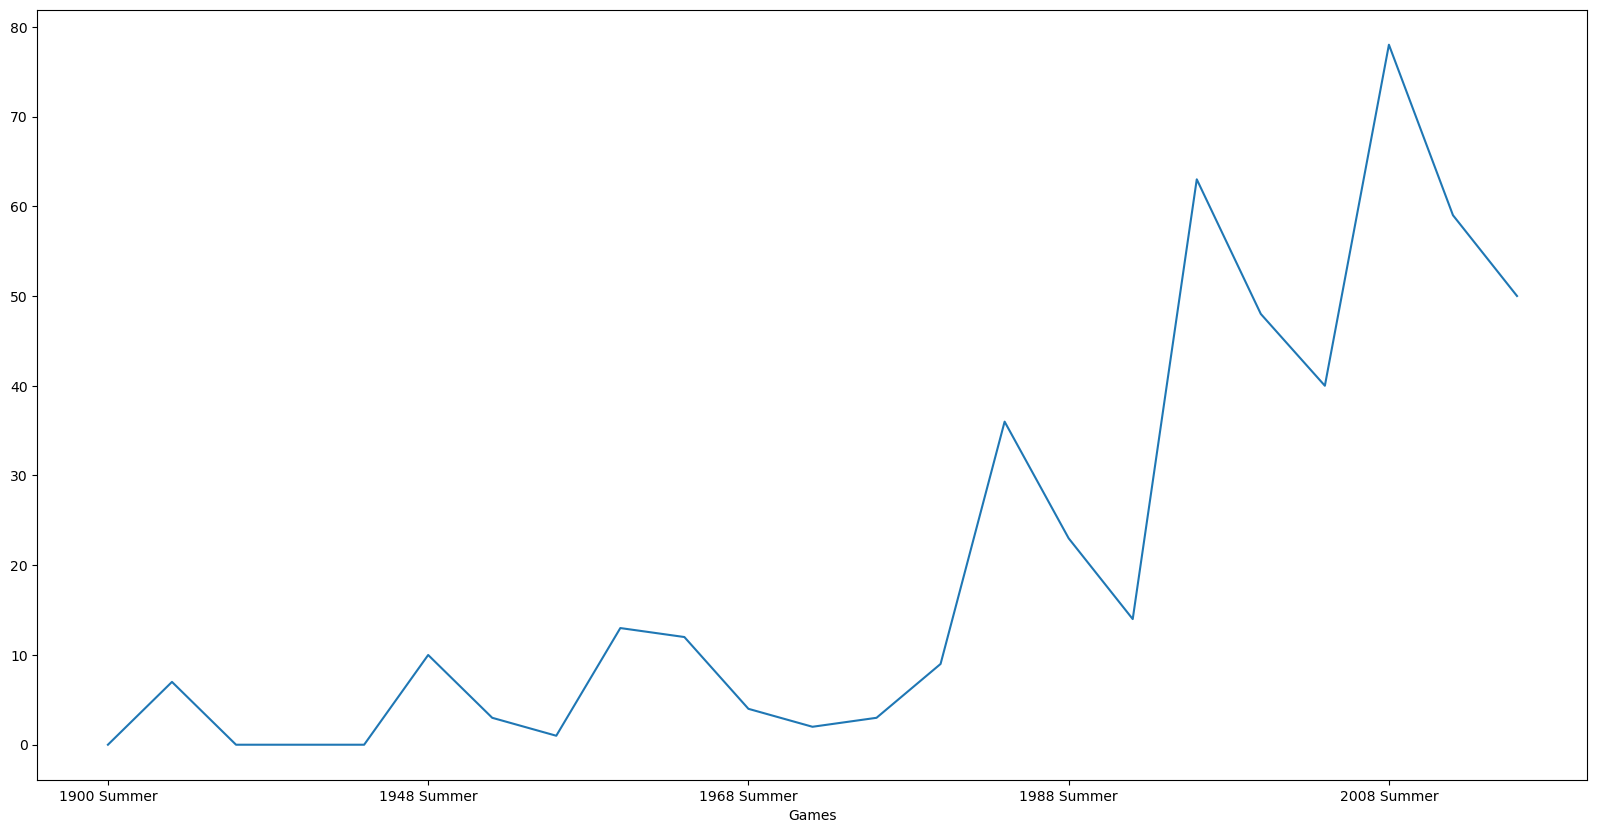

In [24]:
# Use a line chart to plot the medal count for the Brazil team in the Summer Olympics.
games_df_brazil['Medal']['count'].plot(kind='line', figsize=(20, 10))

In [25]:
#create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [27]:
# Clean the Data
#Rename column team to country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"})

# Rename city to host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

# Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == 2016]

# Clean country names
summer_games_df['Country'] = summer_games_df['Country'].replace({'United States-1': 'United States', 'United States-2': 'United States'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Great Britain-1': 'Great Britain', 'Great Britain-2': 'Great Britain'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'France-1': 'France', 'France-2': 'France'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'China-1': 'China', 'China-2': 'China'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Germany-1': 'Germany'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Latvia-1': 'Latvia'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Russia-1': 'Russia'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Japan-1': 'Japan'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Brazil-1': 'Brazil','Brazil-2': 'Brazil'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Czech Republic-1': 'Czech Republic'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'South Korea-1': 'South Korea'})

summer_games_df

,Country,Games,Year,Season,Sport,Event,Medal,Host
80,Romania,2016 Summer,2016,Summer,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Rio de Janeiro
139,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Rio de Janeiro
140,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Rio de Janeiro
141,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Rio de Janeiro
142,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Rio de Janeiro
...,...,...,...,...,...,...,...,...
271024,Germany,2016 Summer,2016,Summer,Badminton,Badminton Men's Singles,NaN,Rio de Janeiro
271053,Kazakhstan,2016 Summer,2016,Summer,Athletics,Athletics Women's 100 metres,NaN,Rio de Janeiro
271054,Kazakhstan,2016 Summer,2016,Summer,Athletics,Athletics Women's 200 metres,NaN,Rio de Janeiro
271055,Kazakhstan,2016 Summer,2016,Summer,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Rio de Janeiro


In [28]:
#Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
80,Romania,2016,Summer,NaN,Rio de Janeiro
139,Spain,2016,Summer,NaN,Rio de Janeiro
140,Spain,2016,Summer,NaN,Rio de Janeiro
141,Spain,2016,Summer,NaN,Rio de Janeiro
142,Spain,2016,Summer,NaN,Rio de Janeiro
...,...,...,...,...,...
271024,Germany,2016,Summer,NaN,Rio de Janeiro
271053,Kazakhstan,2016,Summer,NaN,Rio de Janeiro
271054,Kazakhstan,2016,Summer,NaN,Rio de Janeiro
271055,Kazakhstan,2016,Summer,NaN,Rio de Janeiro


In [29]:
# Create a new dataframe that removes all rows that have an Na in the medal column
brazil2016_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

brazil2016_medals_df

,Country,Year,Season,Medal,Host
158,Italy,2016,Summer,Bronze,Rio de Janeiro
161,Azerbaijan,2016,Summer,Bronze,Rio de Janeiro
175,France,2016,Summer,Silver,Rio de Janeiro
450,Iran,2016,Summer,Bronze,Rio de Janeiro
794,Russia,2016,Summer,Silver,Rio de Janeiro
...,...,...,...,...,...
269511,China,2016,Summer,Gold,Rio de Janeiro
270111,Serbia,2016,Summer,Silver,Rio de Janeiro
270281,Uzbekistan,2016,Summer,Gold,Rio de Janeiro
270370,Serbia,2016,Summer,Silver,Rio de Janeiro


In [31]:
# Create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
brazil2016_medal_countrys_df = brazil2016_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
brazil2016_medal_countrys_df['Gold'] = brazil2016_medals_df[brazil2016_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
brazil2016_medal_countrys_df['Silver'] = brazil2016_medals_df[brazil2016_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
brazil2016_medal_countrys_df['Bronze'] = brazil2016_medals_df[brazil2016_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# Fill NaN values with 0
brazil2016_medal_countrys_df = brazil2016_medal_countrys_df.fillna(0)

# Format values in all columns except Games to integers
brazil2016_medal_countrys_df = brazil2016_medal_countrys_df.astype(int)

brazil2016_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Algeria,2,0,2,0
Argentina,22,21,1,0
Armenia,4,1,3,0
Australia,82,23,34,25
Austria,2,0,0,2
...,...,...,...,...
United Arab Emirates,1,0,0,1
United States,264,139,54,71


In [32]:
# View values in the Country index
brazil2016_medal_countrys_df.index

Index(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Burundi', 'Canada', 'China', 'Chinese Taipei', 'Colombia',
       'Cote d'Ivoire', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Egypt', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Georgia', 'Germany', 'Great Britain', 'Greece', 'Grenada',
       'Hungary', 'India', 'Individual Olympic Athletes', 'Indonesia',
       'Indonesia-1', 'Iran', 'Ireland', 'Israel', 'Italy', 'Italy-1',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo',
       'Lithuania', 'Malaysia', 'Mexico', 'Mongolia', 'Morocco', 'Netherlands',
       'Netherlands-1', 'New Zealand', 'Niger', 'Nigeria', 'North Korea',
       'Norway', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russia', 'Russia-2', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa

In [34]:
## Sort the DataFrame by 'Host' (Brazil first) and then by total medals in descending order
# Sort dataframe by total medal count
brazil2016_sorted = brazil2016_medal_countrys_df.iloc[brazil2016_medal_countrys_df.iloc[:-1].sum(axis=1).argsort()[::-1]]

# Move Brazil row to the top
brazil_row = brazil2016_sorted.loc['Brazil']
df_sorted = brazil2016_sorted.drop('Brazil')
brazil2016_sorted = pd.concat([brazil_row.to_frame().transpose(), brazil2016_sorted])

brazil2016_sorted.head(10)

,Medal,Gold,Silver,Bronze
,count,,,
Brazil,50,36,8,6
United States,264,139,54,71
Germany,159,49,43,67
Great Britain,145,64,55,26
China,113,46,30,37
Russia,113,50,28,35
France,96,20,55,21
Australia,82,23,34,25
Italy,70,8,38,24


In [35]:
# Rename Medal, count column to Total Medals
brazil2016_sorted = brazil2016_sorted.rename(columns = {"Medal" : "Total Medals"})
brazil2016_sorted = brazil2016_sorted.rename(columns = {"count" : " "})

brazil2016_sorted.head(10)

,Total Medals,Gold,Silver,Bronze
,,,,
Brazil,50,36,8,6
United States,264,139,54,71
Germany,159,49,43,67
Great Britain,145,64,55,26
China,113,46,30,37
Russia,113,50,28,35
France,96,20,55,21
Australia,82,23,34,25
Italy,70,8,38,24
